# **Cluster Analysis in Python**

Perhaps you've come across Google News, which groups similar news articles into topics. Have you ever wondered what process is involved in arriving at these groups in the background? Through the use of the SciPy library in Python, you will be introduced to unsupervised learning through clustering. The course covers the pre-processing of data and the application of hierarchical and k-means clustering. As part of this course, you will explore player statistics from a popular football video game, FIFA 18. After completing the course, you will be able to quickly apply various clustering algorithms on data, visualize the clusters formed and analyze results.



### What is unsupervised learning?
* A group of machine learning algorithms that find patterns in data
* Data for algorithms has not been labeled, classified or characterized
* Objective of algorithm is to interpret any structure in data
* Common unsupervised learning algorithms:
    * Clustering
    * Neural networks
    * Anomaly detection

## Introduction to Clustering

To classify news articles, you must first understand the basics of clustering. The purpose of this chapter is to introduce you to a class of machine learning algorithms called unsupervised learning and to introduce you to clustering, one of the most popular unsupervised learning algorithms. There are two popular clustering techniques - hierarchical clustering and k-means clustering. Before you begin clustering data, the chapter concludes with basic pre-processing steps.

### What is clustering?
* The process of grouping items with similar characteristics
* Items in groups similar to each other than in other groups
* Example: distance between points on a 2D plane

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from matplotlib import pyplot as plt


In [31]:
x=[9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y=[8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

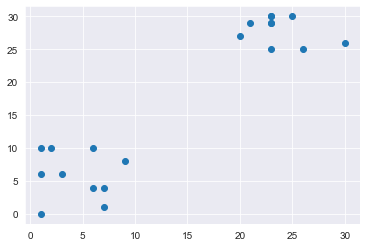

In [32]:
# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

### Clustering algorithms
* Hierarchical clustering
* K means clustering
* Other clustering algorithms: DBSCAN, Gaussian Methods

### Pokémon sightings using Hierarchical clustering in SciPy

In [33]:
df=pd.DataFrame({'x':x,'y':y})

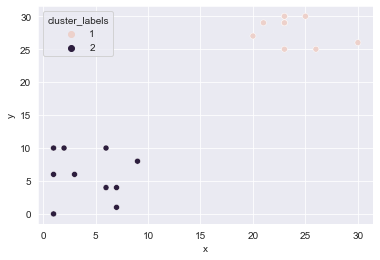

In [34]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Pokémon sightings using k-mean clustering in SciPy

In [35]:
x1=[9.0, 6.0, 2.0, 3.0, 1.0, 7.0, 1.0, 6.0, 1.0, 7.0, 23.0, 26.0, 25.0, 23.0, 21.0, 23.0, 23.0, 20.0, 30.0, 23.0]
y1=[8.0, 4.0, 10.0, 6.0, 0.0, 4.0, 10.0, 10.0, 6.0, 1.0, 29.0, 25.0, 30.0, 29.0, 29.0, 30.0, 25.0, 27.0, 26.0, 30.0]

df1=pd.DataFrame({'x':x1,'y':y1})

In [36]:
df1

,x,y
0,9.0,8.0
1,6.0,4.0
2,2.0,10.0
3,3.0,6.0
4,1.0,0.0
5,7.0,4.0
6,1.0,10.0
7,6.0,10.0
8,1.0,6.0
9,7.0,1.0


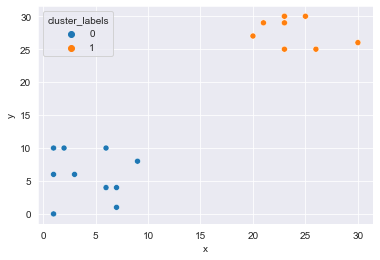

In [37]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df1, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df1, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### **Data preparation for cluster analysis**

### Why do we need to prepare data for clustering?
* Variables have incomparable units (product dimensions in cm, price in $)
* Variables with same units have vastly di(erent scales and variances (expenditures on cereals, travel)
* Data in raw form may lead to bias in clustering
* Clusters may be heavily dependent on one variable
* Solution: normalization of individual variables

### Normalization of data
Normalization: process of rescaling data to a standard deviation of 1

x_new = x / std_dev(x)

In [38]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)
print('Notice the scaled values have less variations in them. You will now visualize the data in the next exercise.')

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]
Notice the scaled values have less variations in them. You will now visualize the data in the next exercise.


### Visualize normalized data

After normalizing your data, you can compare the scaled data to the original data to see the difference

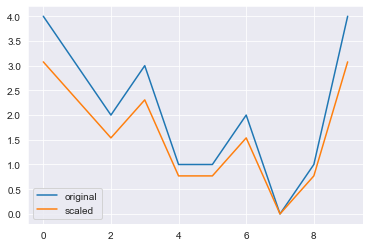

In [39]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

### Normalization of small numbers

Lets look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years

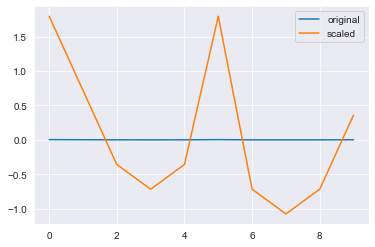

In [40]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [41]:
fifa=pd.read_csv('fifa_18_sample_data.csv')

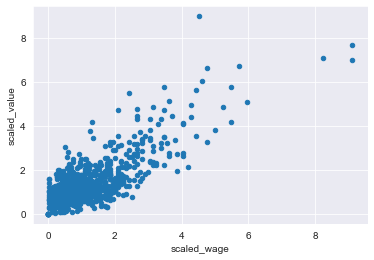

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [42]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

## **Hierarchical Clustering**

The focus of this chapter is on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. As well as providing instructions on how to perform hierarchical clustering, it attempts to answer an important question - how many clusters are present in your data? The chapter concludes with a discussion of the limitations of hierarchical clustering as well as considerations when using hierarchical clustering

### Basics of hierarchical clustering
Clustering methods & which method to be choosen
* 'single' : based on two closest objects
* 'complete' : based on two farthest objects
* 'average' : based on the arithmetic mean of all objects
* 'centroid' : based on the geometric mean of all objects
* 'median' : based on the median of all objects
* 'ward' : based on the sum of squares


In [43]:
comic_con=pd.read_csv('comic_con.csv')

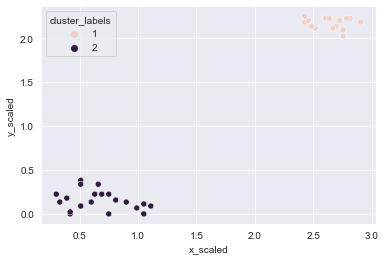

In [44]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: single method

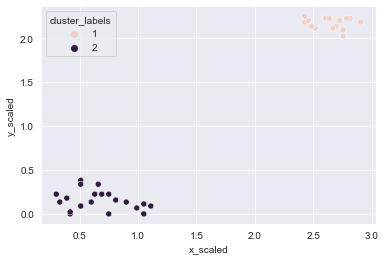

In [45]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: complete method

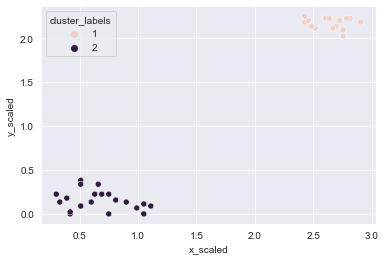

In [46]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

### **Visualize Clusters**

**Visualize clusters with matplotlib**

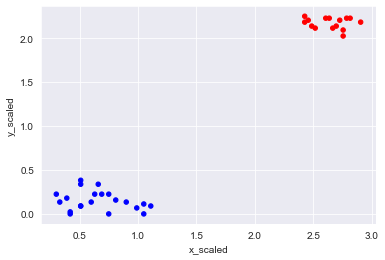

In [47]:
# Import the pyplot class
from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled',
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

**Visualize clusters with seaborn**

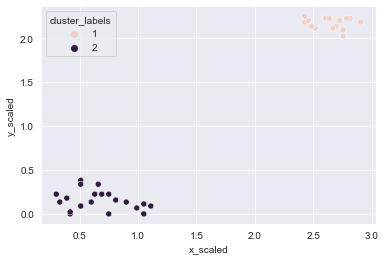

In [48]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data = comic_con)
plt.show()

### Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix

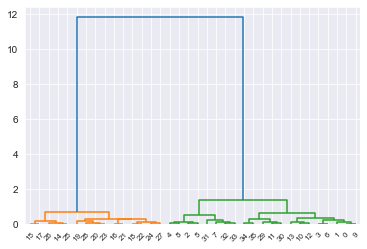

In [49]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
Z = linkage(comic_con[['x_scaled','y_scaled']],
method='ward',metric='euclidean')

dn=dendrogram(Z)

# Display the dendogram
plt.show()

### **Limitations of hierarchical clustering**

**FIFA 18: exploring defenders**

In [50]:
# Scale wage and value
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


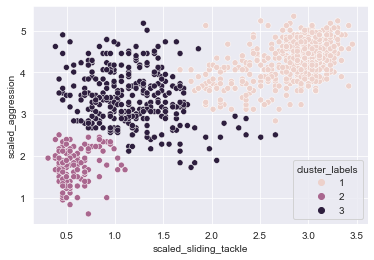

In [51]:
#fifa=pd.read_csv('fifa_18_dataset.csv')
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle','scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

### **K-Means Clustering**

Here we introduce a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed earlier. As dendrograms are specific to hierarchical clustering, this discusses one method to find the number of clusters before running k-means clustering. The  concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

the two steps of k-means clustering:

    * Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
    * Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.


**Why k-means clustering?**
* A critical drawback of hierarchical clustering: runtime
* K means runs signi

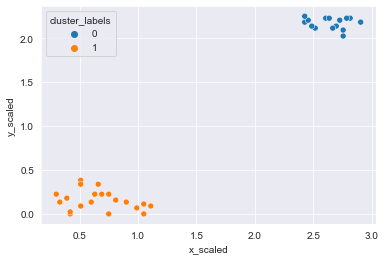

In [52]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

### Elbow method on distinct clusters

**Distortions revisited**
* Distortion: sum of squared distances of points from cluster centers
* Decreases with an increasing number of clusters
* Becomes zero when the number of clusters equals the number of points
* Elbow plot: line plot between cluster centers and distortion

Final thoughts on using the elbow method
* Only gives an indication of optimal k (numbers of clusters)
* Does not always pinpoint how many k (numbers of clusters)
* Other methods: average silhoue


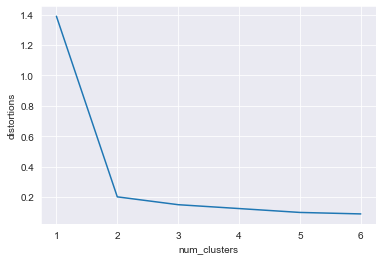

In [53]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [54]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

NameError: name 'uniform_data' is not defined

### Limitations of k-means clustering

* How to find right k (number of clusters)?
* Impact of seeds
* Biased towards equal sized clusters

Final thoughts
* Each technique has its pros and cons
* Consider your data size and pattern before decide on algorithm
* Clustering is exploratory phase of analysis

In [ ]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = mouse)
plt.show()

In [ ]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

### **Clustering in read world**

### Extract RGB values from an image

![](batman.jpg)


In [58]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

r=[]
g=[]
b=[]
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


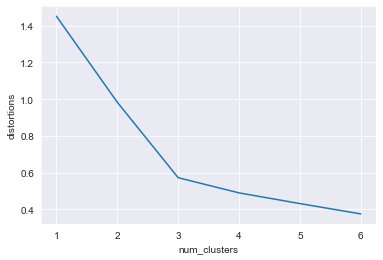


Notice that there are three distinct colors present in the image, which is supported by the elbow plot.


In [60]:
distortions = []
num_clusters = range(1, 7)

# batman data frame from r,g,b lists
batman_df=pd.DataFrame({
    'red':r,
    'blue':b,
    'green':g
})
# standarised RGB values
batman_df['scaled_red']=whiten(batman_df['red'])
batman_df['scaled_blue']=whiten(batman_df['blue'])
batman_df['scaled_green']=whiten(batman_df['green'])

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()
print("\nNotice that there are three distinct colors present in the image, which is supported by the elbow plot.")

### Display dominant colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


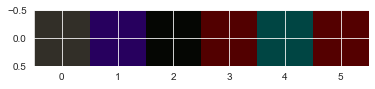


Notice the three colors resemble the three that are indicative from visual inspection of the image


In [66]:
colors=[]

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red','blue', 'green' ]].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()
print("\nNotice the three colors resemble the three that are indicative from visual inspection of the image")

### **Document Clustering**

### TF-IDF of movies plots

* Clean data before processing
* Determine the importance of the terms in a document (in TF-IDF matrix)
* Cluster the TF-IDF matrix
* Find top terms, documents in each cluster

Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

In [68]:
!pip install --user -U nltk

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\dghr201\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [78]:
#import nltk
#nltk.download('punkt')

from nltk.tokenize import word_tokenize
import re

def remove_noise(text,stop_words=[]):
	tokens=word_tokenize(text)
	cleaned_tokens=[]
	for token in tokens:
		token = re.sub('[^A-Za-z0-9]+', '',token)
		if len(token)>1 and token.lower() not in stop_words:
			cleaned_tokens.append(token.lower())
	return cleaned_tokens

stop_words=['it','is','are']
remove_noise('it is lovely weather we are having. I hope the weather continues.',stop_words)

['lovely', 'weather', 'we', 'having', 'hope', 'the', 'weather', 'continues']

In [79]:
plots=pd.read_csv('movies_plot.csv')

# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75,max_features=50,min_df=0.1,tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

Since we have created sparse matrices above, kmeans does not support sparse matrices

use .todense() to convert to a matrix

cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

1. cluster centers list with a size equal to the number of terms
2. each value in the cluster center is its importance
3. create a dictionary and print top terms

In [80]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(),num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['plot', 'title']
['title', 'plot']


In [81]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
1    547
2    139
3    314
Name: ID, dtype: int64
cluster_labels
1    70283.363803
2    51410.071942
3    75926.751592
Name: eur_wage, dtype: float64


                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.684477    5.433653    8.456695    8.516572    2.496427   
1                 5.461627    3.673869    7.180554    6.775813    3.966748   

                scaled_phy  
cluster_labels              
0                 8.332794  
1                 9.206925  


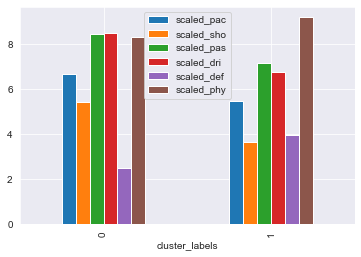

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [88]:
features=['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features=['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']

fifa['scaled_pac']=whiten(fifa['pac'])
fifa['scaled_sho']=whiten(fifa['sho'])
fifa['scaled_pas']=whiten(fifa['pas'])
fifa['scaled_dri']=whiten(fifa['dri'])
fifa['scaled_def']=whiten(fifa['def'])
fifa['scaled_phy']=whiten(fifa['phy'])
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])